<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Batch-Gradient-Descent" data-toc-modified-id="Batch-Gradient-Descent-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Batch Gradient Descent</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li><li><span><a href="#Mini-batch-Gradient-Descent" data-toc-modified-id="Mini-batch-Gradient-Descent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Mini-batch Gradient Descent</a></span></li></ul></li></ul></div>

# Linear regression

In [1]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

In [2]:
# inv()
# dot = multiplication
X_b = np.c_[np.ones((100,1)), X] #add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.02383275],
       [2.96502006]])

In [3]:
#prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.02383275],
       [9.95387286]])

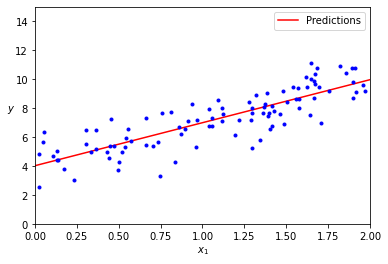

In [23]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend()

plt.axis([0,2,0,15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.02383275]), array([[2.96502006]]))

In [6]:
lin_reg.predict(X_new)

array([[4.02383275],
       [9.95387286]])

In [7]:
#pseudoinvers
np.linalg.pinv(X_b).dot(y)

array([[4.02383275],
       [2.96502006]])

## Batch Gradient Descent

In [13]:
# Batch Gradient Descent
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

theta

array([[-0.34728438],
       [-1.06041282]])

In [14]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients


theta

array([[4.02383275],
       [2.96502006]])

In [26]:
# can make predictions using Gradient Descent Equation in vector expression :

X_new_b.dot(theta)

array([[0.49671415],
       [0.22018555]])

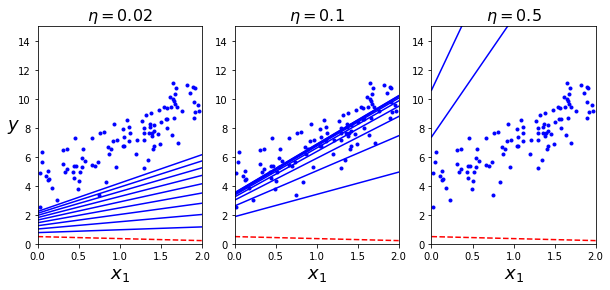

In [25]:
# different learning rate eta
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization


plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

* Gradient Descent ste
$\theta_{next} = \theta - \eta\triangledown_{\theta}MSE(\theta)$
* on the left : the learning rate is too low - the algorithm will eventually reach the solution, but it will take a long tie
* in the middle : the learing rate looks pretty good - in just a few iterations, it has already converged to the solution
* on the right: the learning rate is too high - the algorithm diverges, jumping all over the place and actually getting futher and further away from the solution at every step

-> to find a good learning rate, you can use grid search

## Stochastic Gradient Descent

In [15]:
n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialisation


for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index + 1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
        
theta

array([[3.94987146],
       [2.98462897]])

In [18]:
# apply to SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty=None, eta0 = 0.1)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06148618]), array([3.07075367]))

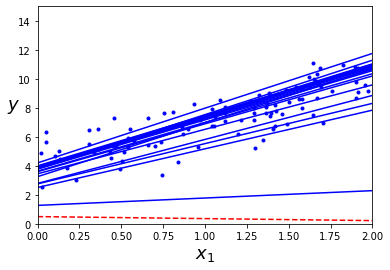

In [31]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

# By convention we iterate by rounds of m iterations; each round is called an epoch.
# While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution:
# the function that determines the learning rate at each iteration is 'learning schedule'
# if the learning rate is reduced too quickly -> you may get stuck in a local minimum
# if the learning rate is reduced too slowly -> you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
# save_fig("sgd_plot")                                 
plt.show()          

## Mini-batch Gradient Descent
* Mini-batch GD computes the gradients on small random sets of instances

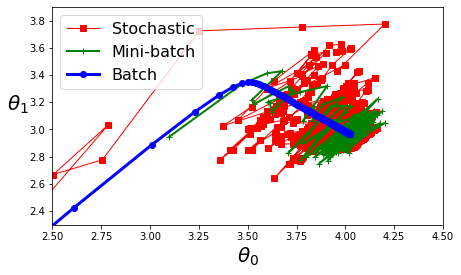

In [32]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

        
        
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
        
# Gradient Descent paths in parameter space
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

* Mini-batch progress in parameter space less erratic than with Stochastic GD
* Batch GD's path stops at the minimum, while both SGD and Mini-batch GD continue to walk around

*reference: Hands-on Machine Leraning with Scikit-Learn, Keras & Tensorflow by Aurélien Géron*